In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("magic04.data",names=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"])

In [3]:
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
le=LabelEncoder()
data["class"]=le.fit_transform(data["class"])

In [10]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
ssc=StandardScaler()
x_train=ssc.fit_transform(x_train)
x_test=ssc.transform(x_test)

In [13]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [14]:
ypred=classifier.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test, ypred)

In [16]:
accuracy 

0.7913774973711882

In [17]:
print(confusion_matrix(y_test, ypred))

[[2777  315]
 [ 677  986]]


In [18]:
target_names = ['class 0', 'class 1']

In [19]:
print(classification_report(y_test, ypred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.90      0.85      3092
     class 1       0.76      0.59      0.67      1663

    accuracy                           0.79      4755
   macro avg       0.78      0.75      0.76      4755
weighted avg       0.79      0.79      0.78      4755



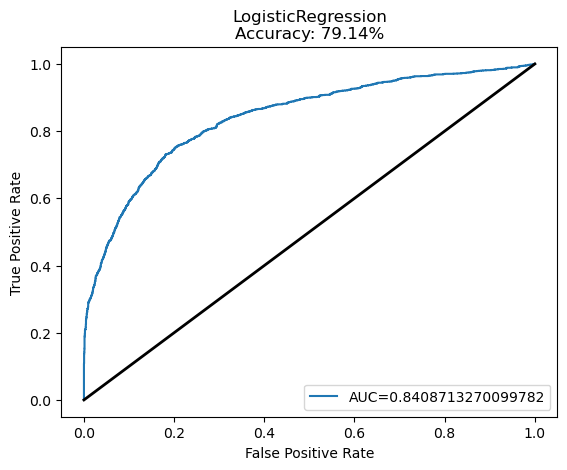

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LogisticRegression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [21]:
coefficients = classifier.coef_
coef = coefficients[0]
odds_ratio = np.exp(coef)

In [22]:
print("Odds Ratio:", odds_ratio)

Odds Ratio: [3.45187725 1.15789074 1.35359731 0.99783205 1.88697543 0.97835814
 0.69309119 0.98894547 3.17728186 1.03358194]


In [23]:
columns=data.columns

In [24]:
columns=columns[:-1]

In [25]:
columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

In [26]:
odds_ratios_df = pd.DataFrame({'Odds Ratio': odds_ratio}, index=columns)
print("\nOdds Ratios:")
print(odds_ratios_df)


Odds Ratios:
          Odds Ratio
fLength     3.451877
fWidth      1.157891
fSize       1.353597
fConc       0.997832
fConc1      1.886975
fAsym       0.978358
fM3Long     0.693091
fM3Trans    0.988945
fAlpha      3.177282
fDist       1.033582
